In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from plotnine import *

In [2]:
d = pd.read_csv('rank_runs_summary.csv')

d

,example_name,estimate_name,SpearmanR_all,SpearmanR_test,pick_auc,data_size,test_size,run_i,rand_seed
0,uci wine example,Stan panel model,0.416480,0.416543,0.856513,6497,6017,0,518677876
1,uci wine example,logistic model,0.435503,0.436348,0.848788,6497,6017,0,518677876
2,uci wine example,Stan comparisons model,0.428649,0.429361,0.856888,6497,6017,0,518677876
3,uci wine example,observed score,0.500823,0.499834,0.846475,6497,6017,0,518677876
4,uci wine example,Stan panel model,0.385339,0.381468,0.887500,6497,6025,1,1451336747
...,...,...,...,...,...,...,...,...,...
395,uci wine example,observed score,0.500551,0.497904,0.901075,6497,6011,98,183758983
396,uci wine example,Stan panel model,0.433635,0.430637,0.884413,6497,6015,99,51265350
397,uci wine example,logistic model,0.450242,0.447732,0.882138,6497,6015,99,51265350
398,uci wine example,Stan comparisons model,0.460090,0.457902,0.882538,6497,6015,99,51265350


In [3]:
d_SpearmanR = d.melt(
    id_vars=['example_name', 'estimate_name'],
    value_vars=['SpearmanR_all', 'SpearmanR_test'],
    var_name='measurement',
    value_name='Spearman R',
)

d_SpearmanR

,example_name,estimate_name,measurement,Spearman R
0,uci wine example,Stan panel model,SpearmanR_all,0.416480
1,uci wine example,logistic model,SpearmanR_all,0.435503
2,uci wine example,Stan comparisons model,SpearmanR_all,0.428649
3,uci wine example,observed score,SpearmanR_all,0.500823
4,uci wine example,Stan panel model,SpearmanR_all,0.385339
...,...,...,...,...
795,uci wine example,observed score,SpearmanR_test,0.497904
796,uci wine example,Stan panel model,SpearmanR_test,0.430637
797,uci wine example,logistic model,SpearmanR_test,0.447732
798,uci wine example,Stan comparisons model,SpearmanR_test,0.457902


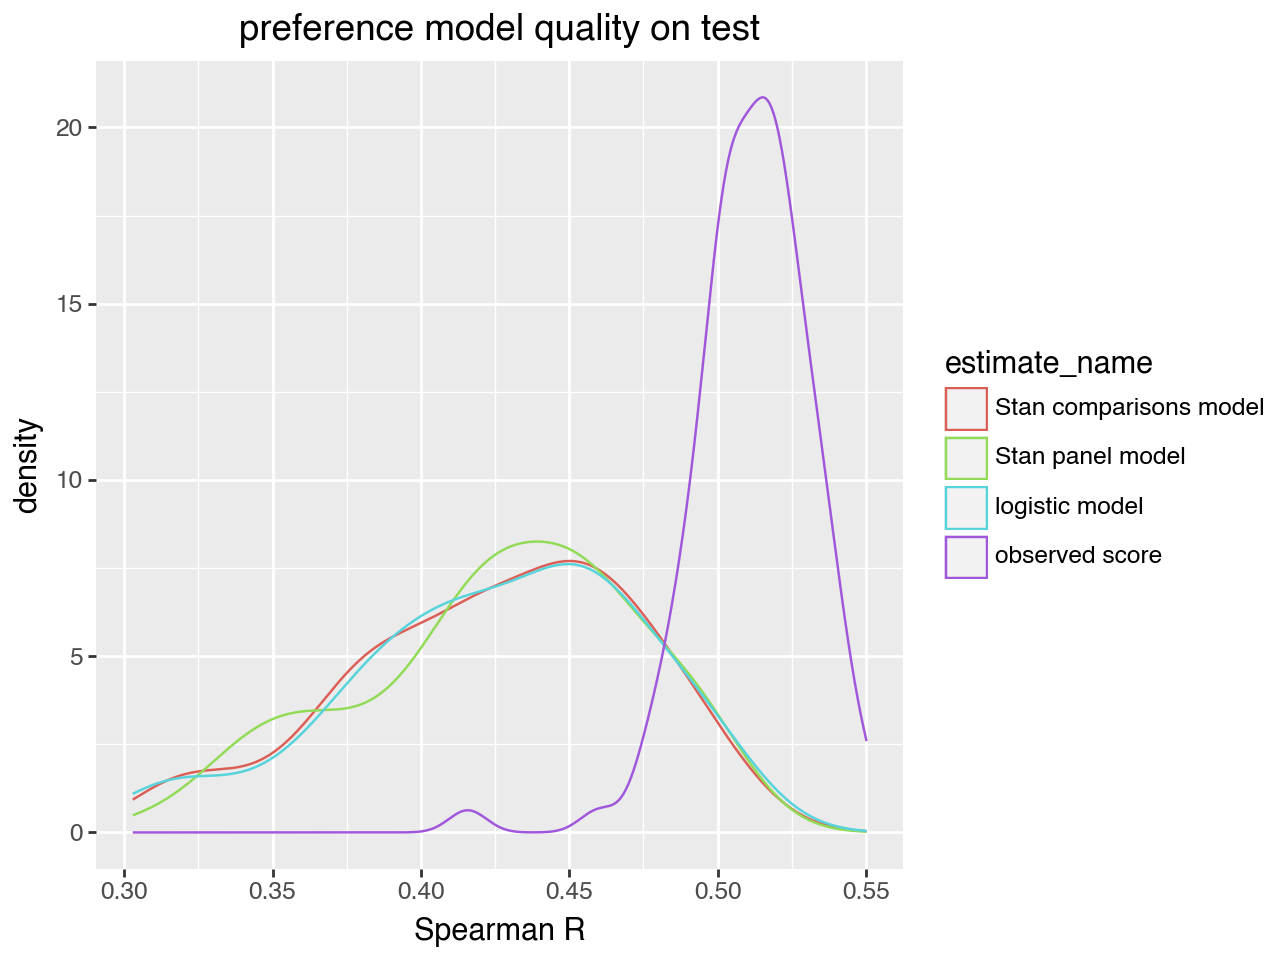

In [4]:
(
    ggplot(
        data=d_SpearmanR.loc[d_SpearmanR['measurement'] == 'SpearmanR_test', :],
        mapping=aes(
            x='Spearman R',
            color='estimate_name',
        )
    )
    + geom_density()
    + ggtitle("preference model quality on test")
)

In [5]:
estimate_names = sorted(set(d['estimate_name']))

estimate_names

['Stan comparisons model',
 'Stan panel model',
 'logistic model',
 'observed score']

Stan comparisons model


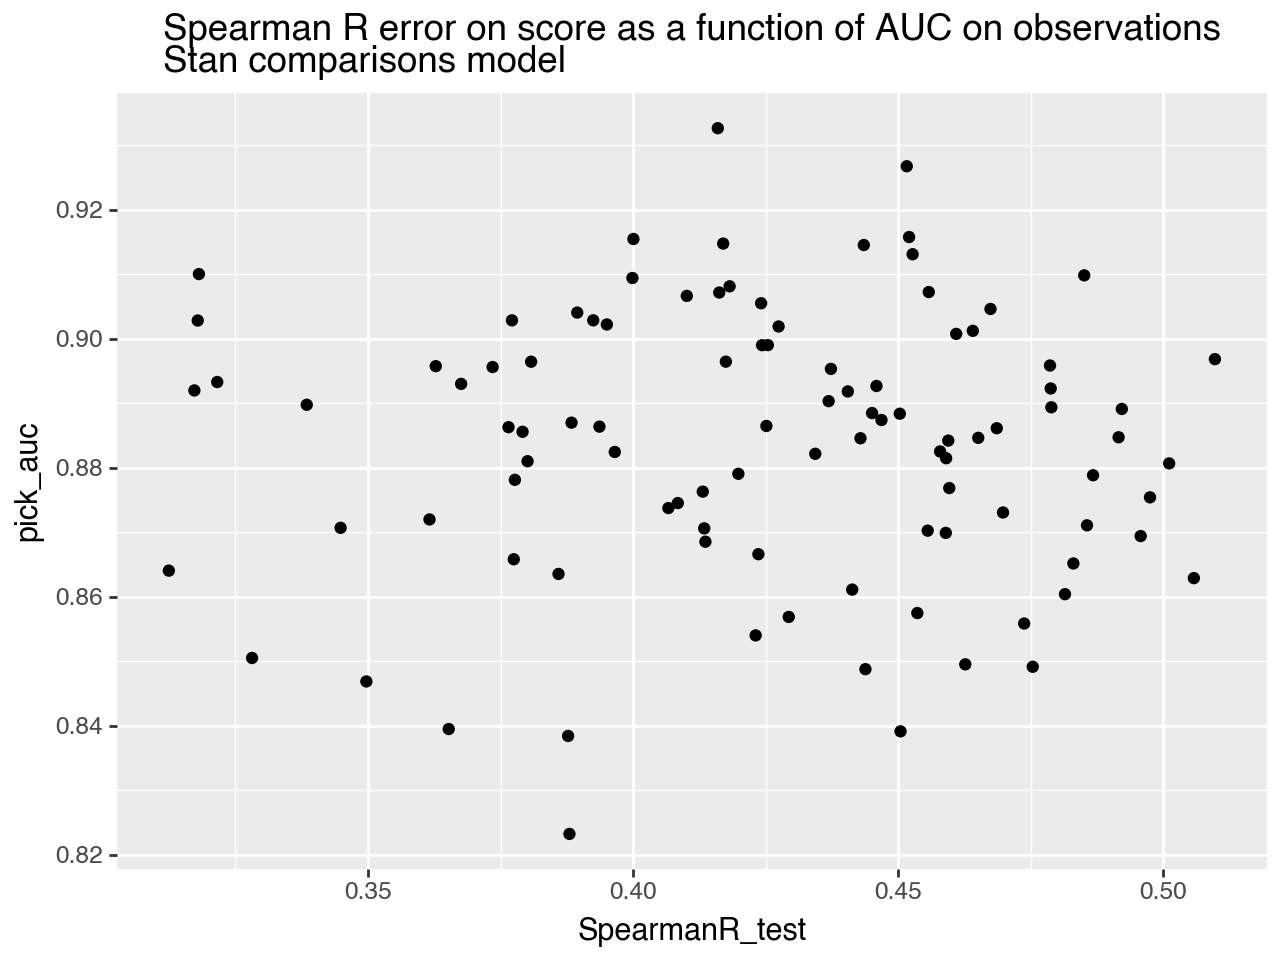

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SpearmanR_test   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.004576
Date:                Sun, 25 Aug 2024   Prob (F-statistic):              0.946
Time:                        15:27:41   Log-Likelihood:                 161.94
No. Observations:                 100   AIC:                            -319.9
Df Residuals:                      98   BIC:                            -314.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4384      0.206      2.131      0.036       0.030       0.847
pick_auc      -0.0157      0.233     -0.068      0.946      -0.478       0.446
==============================================================================
Omnibus:                        4.526   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                4.358
Skew:                          -0.457   Prob(JB):                        0.113
Kurtosis:                       2.542   Cond. No.                         85.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Stan panel model


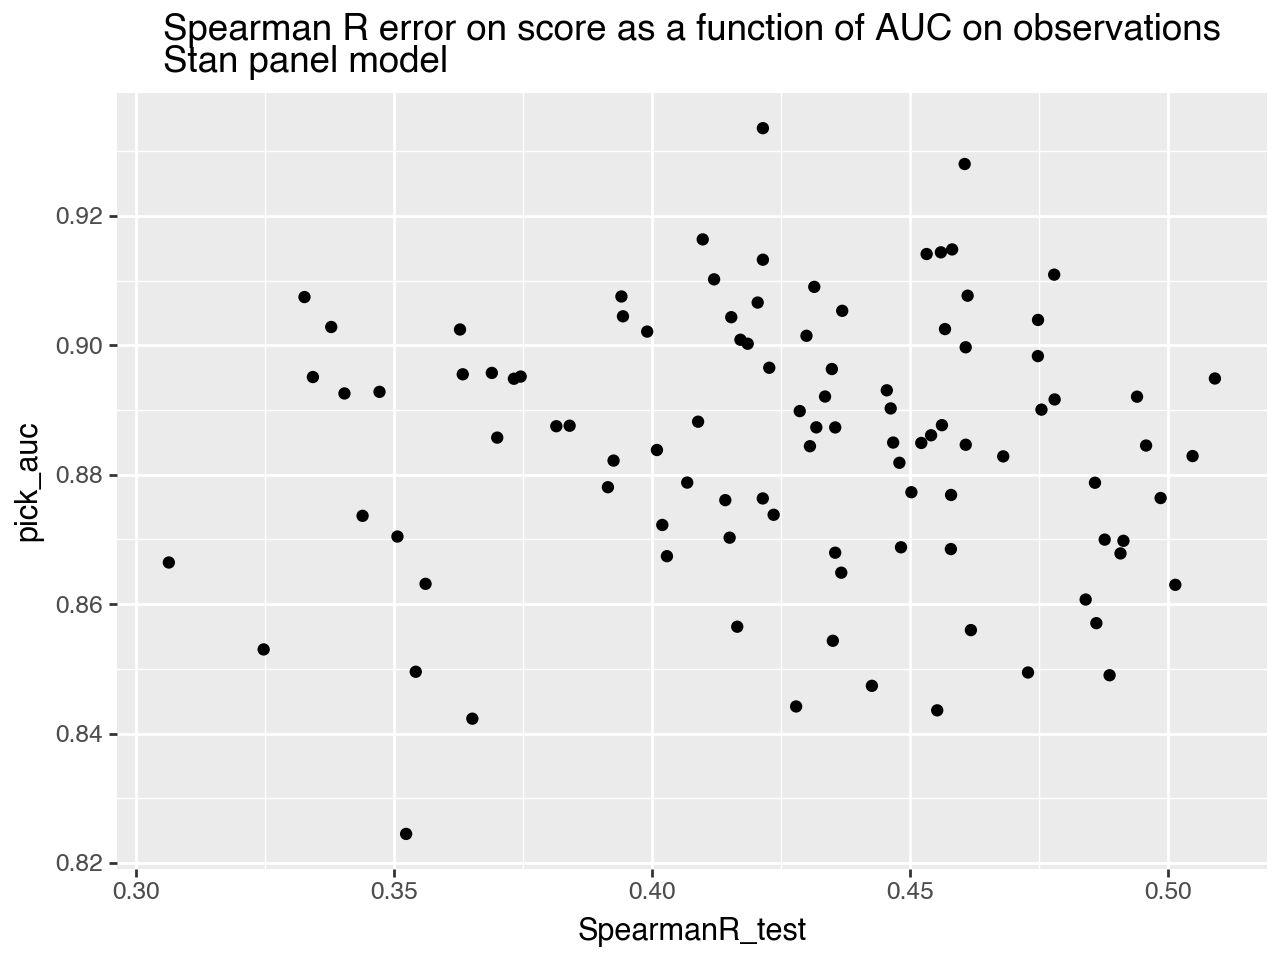

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SpearmanR_test   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.009919
Date:                Sun, 25 Aug 2024   Prob (F-statistic):              0.921
Time:                        15:27:42   Log-Likelihood:                 163.49
No. Observations:                 100   AIC:                            -323.0
Df Residuals:                      98   BIC:                            -317.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4057      0.206      1.966      0.052      -0.004       0.815
pick_auc       0.0232      0.233      0.100      0.921      -0.440       0.486
==============================================================================
Omnibus:                        4.871   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.361
Skew:                          -0.432   Prob(JB):                        0.113
Kurtosis:                       2.453   Cond. No.                         87.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

logistic model


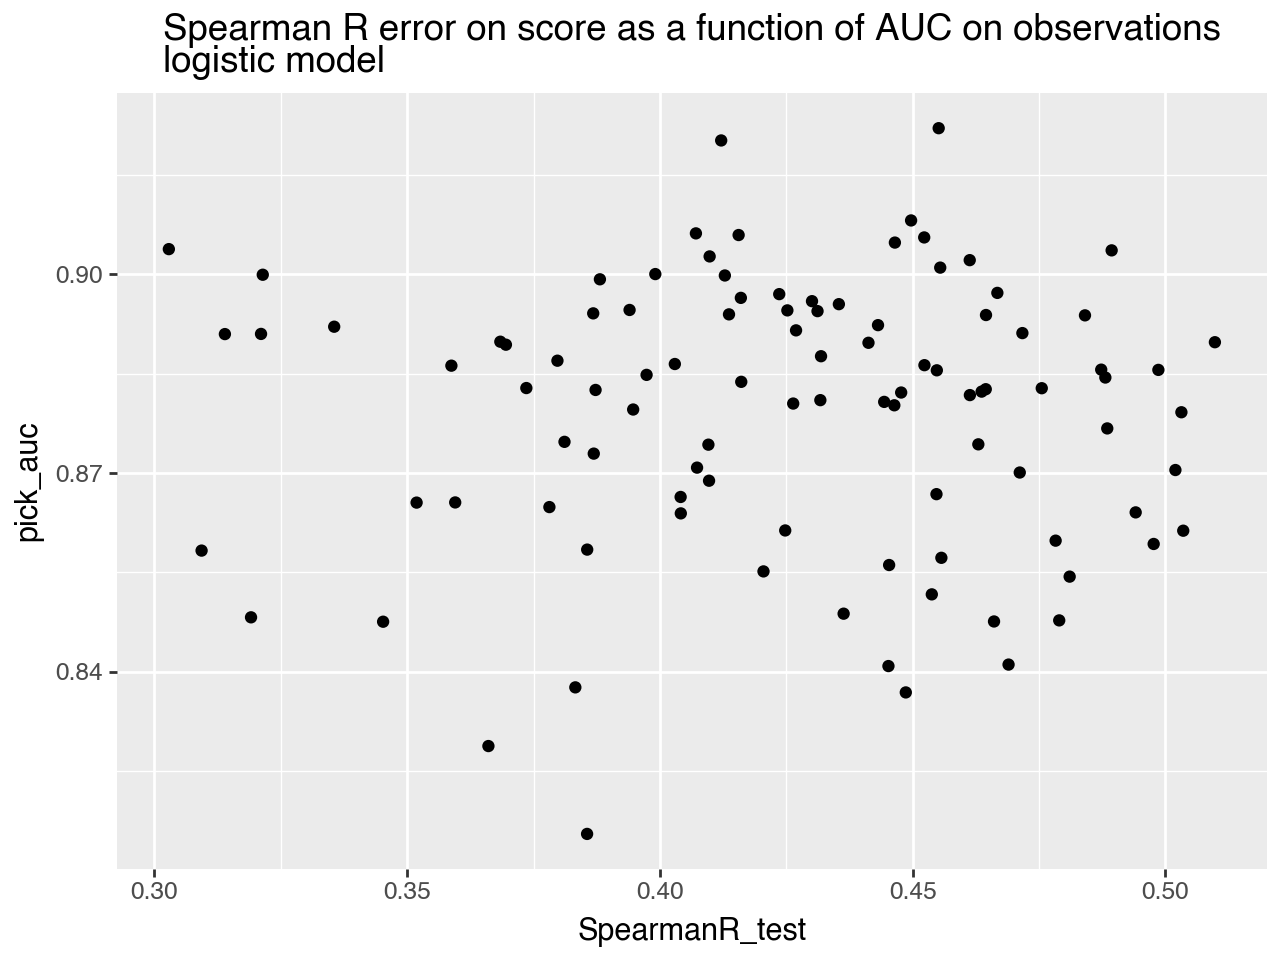

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SpearmanR_test   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.002514
Date:                Sun, 25 Aug 2024   Prob (F-statistic):              0.960
Time:                        15:27:42   Log-Likelihood:                 159.84
No. Observations:                 100   AIC:                            -315.7
Df Residuals:                      98   BIC:                            -310.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4143      0.214      1.941      0.055      -0.009       0.838
pick_auc       0.0122      0.243      0.050      0.960      -0.470       0.494
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.556
Skew:                          -0.500   Prob(JB):                        0.102
Kurtosis:                       2.697   Cond. No.                         87.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

observed score


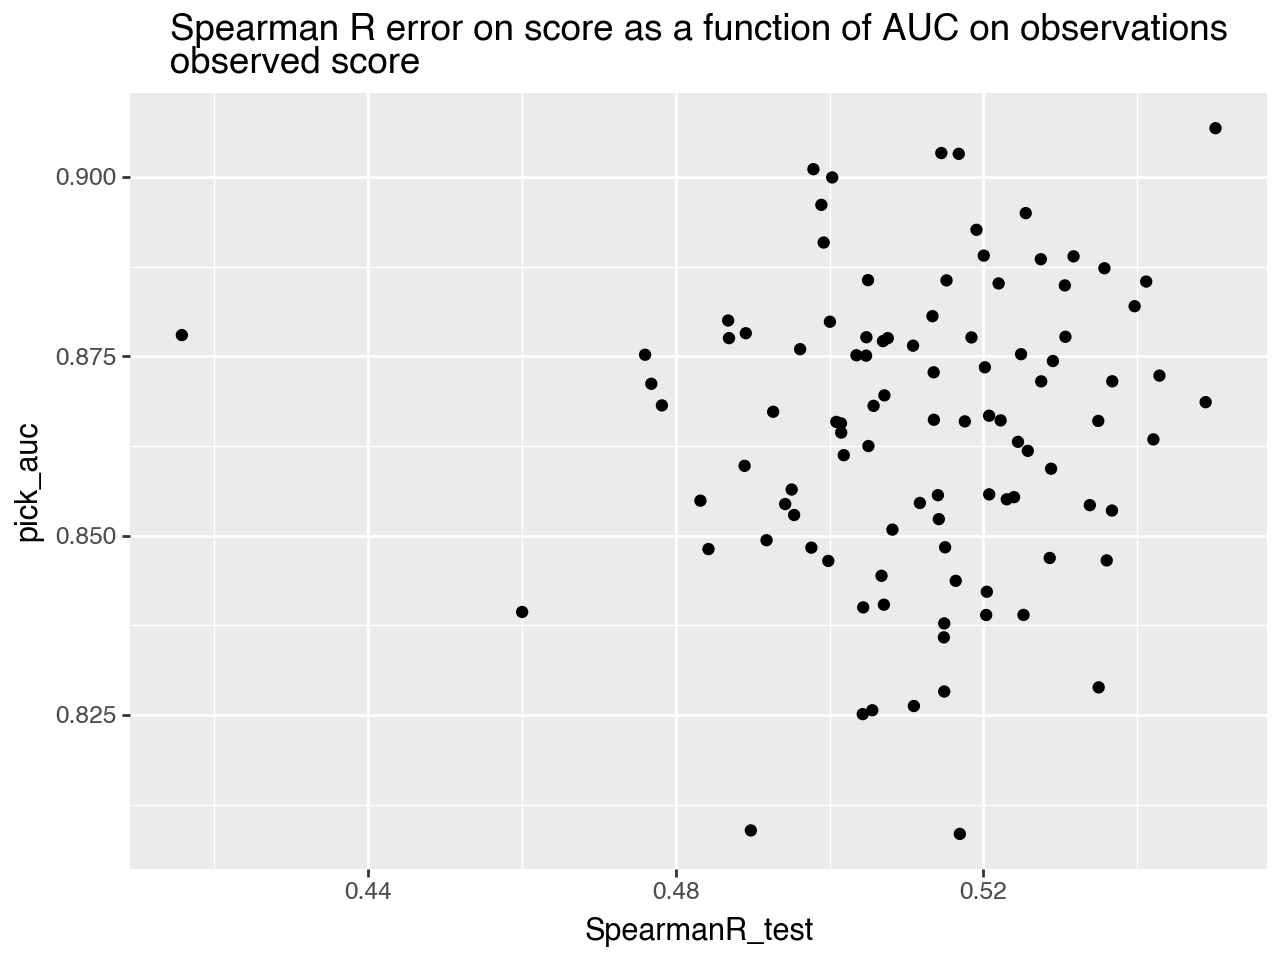

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SpearmanR_test   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6873
Date:                Sun, 25 Aug 2024   Prob (F-statistic):              0.409
Time:                        15:27:42   Log-Likelihood:                 251.20
No. Observations:                 100   AIC:                            -498.4
Df Residuals:                      98   BIC:                            -493.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4420      0.084      5.265      0.000       0.275       0.609
pick_auc       0.0805      0.097      0.829      0.409      -0.112       0.273
==============================================================================
Omnibus:                       37.202   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.982
Skew:                          -1.257   Prob(JB):                     4.82e-25
Kurtosis:                       7.534   Cond. No.                         85.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
for estimate_name in estimate_names:
    di = d.loc[d['estimate_name'] == estimate_name, :]
    print(estimate_name)
    (
        ggplot(
            data=di,
            mapping=aes(x='SpearmanR_test', y='pick_auc')
        )
        + geom_point()
        + ggtitle(f"Spearman R error on score as a function of AUC on observations\n{estimate_name}")
    ).show()
    model = ols(
        'SpearmanR_test ~ pick_auc',
        data=di,
    ).fit()
    display(model.summary())